In [1]:
import pandas as pd
import numpy as np
import os, glob
import datetime
import matplotlib.pyplot as plt

prgname = 'sp_EDA_statistics_route_echvolnter.ipynb'

In [2]:
path = "/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/"
all_files = glob.glob(os.path.join(path, "cell-*.csv"))
print(len(all_files))
nfls = len(all_files)

53


In [3]:
newdff = pd.DataFrame()
#pick the voluteer name
name2 = all_files[0].split("/")[-2]
name = name2.split("_")[-1]
print(name)

Kishore


#### just run second time from here, because appending the data frame for each route of the volunteer

In [4]:
#new dataframe to store append result
newDataFrame = pd.DataFrame()

cnt = 0
for fle in all_files:
    df = pd.read_csv(fle, skiprows=1,low_memory=True, header=None)
    numcols = len(df.columns)
    print("fname: {0}; no. of cloumns: {1}".format(fle, numcols))
    #if(numcols >11): print('Number of columns: ',numcols)
    
    df.rename(columns={0:"route", 1:"mode", 2:"cellinfo", 3:"cputime", 4:"dsptime", 5: "status", 6: "ncells", 
                       7:"type", 8:"pci",9:"regi", 10:"rsrp", 11:"rsrq", 12:"sinr",13:"rssi",14:"level",
                       15:"csirsrp",16:"csirsrq",17:"csisinr",18:"cqisindx",19:"cqis"}, inplace = True)
    df.drop(["dsptime","csirsrp","csirsrq","csisinr","cqisindx","cqis"], axis=1, inplace=True)
    #skip the last row
    df = df[:-1]
        
    #change cputime to date-time format
    df['datetime'] = pd.to_datetime(df['cputime'], unit='ms',utc=True).map(lambda x: x.tz_convert('America/Los_Angeles'))
    df['date'] = pd.to_datetime(df['datetime']).dt.date
    df['time'] = pd.to_datetime(df['datetime']).dt.time
    df.drop(['datetime'],axis=1, inplace=True)
        
    #dropping some more columns before going to the EDA
    df.drop(['mode','cellinfo','cputime','status','type','pci','regi', "sinr",'level','date','time'], axis=1, inplace= True)
    df = df[["route","rsrp", "rsrq", "rssi", "ncells"]]
    
    rte = "ROUTE_A"                             #change ROUTE A/B
    chk = df['route'].iloc[0]
    if(chk == rte):
        cnt += 1
        

    dff = df[df['route'] == rte]
    display(dff)

    newDataFrame = newDataFrame.append(dff)
    
print(f"one route count: ",cnt)  



fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-06-17-27-14-269000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-22-16-01-11-551000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-05-17-00-56-612000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-29-07-11-00-287000000-fill_out_your_user_id.csv; no. of cloumns: 20


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -87.0 -11.0 -55.0     4.0
1       ROUTE_A  -87.0 -11.0 -55.0     4.0
2       ROUTE_A  -87.0 -11.0 -55.0     4.0
3       ROUTE_A  -87.0 -11.0 -55.0     4.0
4       ROUTE_A  -87.0 -11.0 -55.0     4.0
...         ...    ...   ...   ...     ...
109671  ROUTE_A -105.0 -11.0 -75.0     6.0
109672  ROUTE_A -105.0 -11.0 -75.0     6.0
109673  ROUTE_A -105.0 -11.0 -75.0     6.0
109674  ROUTE_A -105.0 -11.0 -75.0     6.0
109675  ROUTE_A -105.0 -11.0 -75.0     6.0

[109676 rows x 5 columns]

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-10-16-45-39-934000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-29-06-49-09-368000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-26-06-44-55-607000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-22-06-50-17-078000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-11-19-34-21-846000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-05-07-10-43-149000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


route  rsrp  rsrq  rssi  ncells
0       ROUTE_A -81.0 -10.0 -51.0    12.0
1       ROUTE_A -81.0 -10.0 -51.0    12.0
2       ROUTE_A -81.0 -10.0 -51.0    12.0
3       ROUTE_A -81.0 -10.0 -51.0    12.0
4       ROUTE_A -81.0 -10.0 -51.0    12.0
...         ...   ...   ...   ...     ...
111217  ROUTE_A -97.0 -10.0 -69.0    28.0
111218  ROUTE_A -97.0 -10.0 -69.0    28.0
111219  ROUTE_A -97.0 -10.0 -69.0    28.0
111220  ROUTE_A -97.0 -10.0 -69.0    28.0
111221  ROUTE_A -97.0 -10.0 -69.0    28.0

[111222 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-20-07-17-38-239000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


route   rsrp  rsrq  rssi  ncells
0      ROUTE_A -108.0 -13.0 -73.0     6.0
1      ROUTE_A -108.0 -13.0 -73.0     6.0
2      ROUTE_A -108.0 -13.0 -73.0     6.0
3      ROUTE_A -108.0 -13.0 -73.0     6.0
4      ROUTE_A -108.0 -13.0 -73.0     6.0
...        ...    ...   ...   ...     ...
49830  ROUTE_A  -96.0 -12.0 -65.0    18.0
49831  ROUTE_A  -96.0 -12.0 -65.0    18.0
49832  ROUTE_A  -96.0 -12.0 -65.0    18.0
49833  ROUTE_A  -96.0 -12.0 -65.0    18.0
49834  ROUTE_A  -96.0 -12.0 -65.0    18.0

[49835 rows x 5 columns]

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-12-07-14-32-483000000-fill_out_your_user_id.csv; no. of cloumns: 20


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -94.0  -9.0 -65.0     4.0
1       ROUTE_A  -94.0  -9.0 -65.0     4.0
2       ROUTE_A  -94.0  -9.0 -65.0     4.0
3       ROUTE_A  -94.0  -9.0 -65.0     4.0
4       ROUTE_A  -94.0  -9.0 -65.0     4.0
...         ...    ...   ...   ...     ...
124738  ROUTE_A -100.0 -17.0 -65.0     5.0
124739  ROUTE_A -100.0 -17.0 -65.0     5.0
124740  ROUTE_A -100.0 -17.0 -65.0     5.0
124741  ROUTE_A -100.0 -17.0 -65.0     5.0
124742  ROUTE_A -100.0 -17.0 -65.0     5.0

[124743 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-12-07-11-10-340000000-fill_out_your_user_id.csv; no. of cloumns: 20


route  rsrp  rsrq  rssi  ncells
0    ROUTE_A -83.0 -11.0 -51.0     2.0
1    ROUTE_A -83.0 -11.0 -51.0     2.0
2    ROUTE_A -83.0 -11.0 -51.0     2.0
3    ROUTE_A -83.0 -11.0 -51.0     2.0
4    ROUTE_A -83.0 -11.0 -51.0     2.0
..       ...   ...   ...   ...     ...
96   ROUTE_A -84.0 -10.0 -53.0     2.0
97   ROUTE_A -84.0 -10.0 -53.0     2.0
98   ROUTE_A -84.0 -10.0 -53.0     2.0
99   ROUTE_A -84.0 -10.0 -53.0     2.0
100  ROUTE_A -84.0 -10.0 -53.0     2.0

[101 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-27-07-09-47-796000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


route  rsrp  rsrq  rssi  ncells
0       ROUTE_A -85.0  -7.0 -57.0    14.0
1       ROUTE_A -85.0  -7.0 -57.0    14.0
2       ROUTE_A -85.0  -7.0 -57.0    14.0
3       ROUTE_A -85.0  -7.0 -57.0    14.0
4       ROUTE_A -85.0  -7.0 -57.0    14.0
...         ...   ...   ...   ...     ...
119607  ROUTE_A -97.0 -16.0 -61.0    30.0
119608  ROUTE_A -97.0 -16.0 -61.0    30.0
119609  ROUTE_A -97.0 -16.0 -61.0    30.0
119610  ROUTE_A -97.0 -16.0 -61.0    30.0
119611  ROUTE_A -97.0 -16.0 -61.0    30.0

[119612 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-12-06-42-47-261000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-11-17-44-11-192000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-11-06-44-22-180000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-20-07-12-50-959000000-fill_out_your_user_id.csv; no. of cloumns: 20


route  rsrp  rsrq  rssi  ncells
0    ROUTE_A -85.0  -9.0 -55.0     4.0
1    ROUTE_A -85.0  -9.0 -55.0     4.0
2    ROUTE_A -85.0  -9.0 -55.0     4.0
3    ROUTE_A -85.0  -9.0 -55.0     4.0
4    ROUTE_A -85.0  -9.0 -55.0     4.0
..       ...   ...   ...   ...     ...
570  ROUTE_A -95.0  -7.0 -67.0     6.0
571  ROUTE_A -95.0  -7.0 -67.0     6.0
572  ROUTE_A -95.0  -7.0 -67.0     6.0
573  ROUTE_A -95.0  -7.0 -67.0     6.0
574  ROUTE_A -95.0  -7.0 -67.0     6.0

[575 rows x 5 columns]

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-28-07-05-58-451000000-fill_out_your_user_id.csv; no. of cloumns: 20


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -92.0  -7.0 -67.0    12.0
1       ROUTE_A  -92.0  -7.0 -67.0    12.0
2       ROUTE_A  -92.0  -7.0 -67.0    12.0
3       ROUTE_A  -92.0  -7.0 -67.0    12.0
4       ROUTE_A  -92.0  -7.0 -67.0    12.0
...         ...    ...   ...   ...     ...
117093  ROUTE_A -104.0 -14.0 -69.0     6.0
117094  ROUTE_A -104.0 -14.0 -69.0     6.0
117095  ROUTE_A -104.0 -14.0 -69.0     6.0
117096  ROUTE_A -104.0 -14.0 -69.0     6.0
117097  ROUTE_A -104.0 -14.0 -69.0     6.0

[117098 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-10-07-10-49-218000000-fill_out_your_user_id.csv; no. of cloumns: 20


route  rsrp  rsrq  rssi  ncells
0     ROUTE_A -79.0  -7.0 -51.0     8.0
1     ROUTE_A -79.0  -7.0 -51.0     8.0
2     ROUTE_A -79.0  -7.0 -51.0     8.0
3     ROUTE_A -79.0  -7.0 -51.0     8.0
4     ROUTE_A -79.0  -7.0 -51.0     8.0
...       ...   ...   ...   ...     ...
4620  ROUTE_A -81.0  -7.0 -53.0    10.0
4621  ROUTE_A -81.0  -7.0 -53.0    10.0
4622  ROUTE_A -81.0  -7.0 -53.0    10.0
4623  ROUTE_A -81.0  -7.0 -53.0    10.0
4624  ROUTE_A -81.0  -7.0 -53.0    10.0

[4625 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-06-06-50-30-339000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-10-06-51-55-860000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-10-08-08-29-107000000-fill_out_your_user_id.csv; no. of cloumns: 20


route   rsrp  rsrq  rssi  ncells
0      ROUTE_A  -95.0  -7.0 -71.0    10.0
1      ROUTE_A  -95.0  -7.0 -71.0    10.0
2      ROUTE_A  -95.0  -7.0 -71.0    10.0
3      ROUTE_A  -95.0  -7.0 -71.0    10.0
4      ROUTE_A  -95.0  -7.0 -71.0    10.0
...        ...    ...   ...   ...     ...
12914  ROUTE_A -110.0  -7.0 -81.0    12.0
12915  ROUTE_A -110.0  -7.0 -81.0    12.0
12916  ROUTE_A -110.0  -7.0 -81.0    12.0
12917  ROUTE_A -110.0  -7.0 -81.0    12.0
12918  ROUTE_A -110.0  -7.0 -81.0    12.0

[12919 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-29-16-06-59-392000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-20-17-49-29-779000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-28-16-09-34-864000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-29-17-18-52-579000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-26-17-47-55-936000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-21-16-59-34-977000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-06-17-26-56-389000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-26-16-46-36-124000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-11-17-40-44-985000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-22-07-12-07-767000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -94.0  -8.0 -65.0     4.0
1       ROUTE_A  -94.0  -8.0 -65.0     4.0
2       ROUTE_A  -94.0  -8.0 -65.0     4.0
3       ROUTE_A  -94.0  -8.0 -65.0     4.0
4       ROUTE_A  -94.0  -8.0 -65.0     4.0
...         ...    ...   ...   ...     ...
126991  ROUTE_A -108.0 -12.0 -81.0    16.0
126992  ROUTE_A -108.0 -12.0 -81.0    16.0
126993  ROUTE_A -108.0 -12.0 -81.0    16.0
126994  ROUTE_A -108.0 -12.0 -81.0    16.0
126995  ROUTE_A -108.0 -12.0 -81.0    16.0

[126996 rows x 5 columns]

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-20-16-35-05-002000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-27-17-19-05-761000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-05-16-02-30-104000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-10-16-45-30-706000000-fill_out_your_user_id.csv; no. of cloumns: 20


route  rsrp  rsrq  rssi  ncells
0    ROUTE_A -99.0 -11.0 -67.0    10.0
1    ROUTE_A -99.0 -11.0 -67.0    10.0
2    ROUTE_A -99.0 -11.0 -67.0    10.0
3    ROUTE_A -99.0 -11.0 -67.0    10.0
4    ROUTE_A -99.0 -11.0 -67.0    10.0
..       ...   ...   ...   ...     ...
180  ROUTE_A -97.0 -10.0 -67.0    10.0
181  ROUTE_A -97.0 -10.0 -67.0    10.0
182  ROUTE_A -97.0 -10.0 -67.0    10.0
183  ROUTE_A -97.0 -10.0 -67.0    10.0
184  ROUTE_A -97.0 -10.0 -67.0    10.0

[185 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-06-16-16-29-894000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-10-07-14-39-852000000-fill_out_your_user_id.csv; no. of cloumns: 20


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A -100.0 -11.0 -65.0     6.0
1       ROUTE_A -100.0 -11.0 -65.0     6.0
2       ROUTE_A -100.0 -11.0 -65.0     6.0
3       ROUTE_A -100.0 -11.0 -65.0     6.0
4       ROUTE_A -100.0 -11.0 -65.0     6.0
...         ...    ...   ...   ...     ...
125094  ROUTE_A -105.0  -8.0 -79.0    12.0
125095  ROUTE_A -105.0  -8.0 -79.0    12.0
125096  ROUTE_A -105.0  -8.0 -79.0    12.0
125097  ROUTE_A -105.0  -8.0 -79.0    12.0
125098  ROUTE_A -105.0  -8.0 -79.0    12.0

[125099 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-28-06-48-58-439000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-15-16-18-20-428000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-27-18-18-37-396000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-05-06-49-36-365000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-26-07-10-43-787000000-fill_out_your_user_id.csv; no. of cloumns: 20


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -80.0  -7.0 -55.0     2.0
1       ROUTE_A  -80.0  -7.0 -55.0     2.0
2       ROUTE_A  -80.0  -7.0 -55.0     2.0
3       ROUTE_A  -80.0  -7.0 -55.0     2.0
4       ROUTE_A  -80.0  -7.0 -55.0     2.0
...         ...    ...   ...   ...     ...
120966  ROUTE_A -102.0 -16.0 -67.0    22.0
120967  ROUTE_A -102.0 -16.0 -67.0    22.0
120968  ROUTE_A -102.0 -16.0 -67.0    22.0
120969  ROUTE_A -102.0 -16.0 -67.0    22.0
120970  ROUTE_A -102.0 -16.0 -67.0    22.0

[120971 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-06-07-10-07-940000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -85.0  -8.0 -55.0    14.0
1       ROUTE_A  -85.0  -8.0 -55.0    14.0
2       ROUTE_A  -85.0  -8.0 -55.0    14.0
3       ROUTE_A  -85.0  -8.0 -55.0    14.0
4       ROUTE_A  -85.0  -8.0 -55.0    14.0
...         ...    ...   ...   ...     ...
111571  ROUTE_A -101.0 -11.0 -69.0    12.0
111572  ROUTE_A -101.0 -11.0 -69.0    12.0
111573  ROUTE_A -101.0 -11.0 -69.0    12.0
111574  ROUTE_A -101.0 -11.0 -69.0    12.0
111575  ROUTE_A -101.0 -11.0 -69.0    12.0

[111576 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-21-18-09-38-561000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-11-07-11-15-523000000-fill_out_your_user_id.csv; no. of cloumns: 20


route  rsrp  rsrq  rssi  ncells
0       ROUTE_A -98.0  -8.0 -69.0     2.0
1       ROUTE_A -98.0  -8.0 -69.0     2.0
2       ROUTE_A -98.0  -8.0 -69.0     2.0
3       ROUTE_A -98.0  -8.0 -69.0     2.0
4       ROUTE_A -98.0  -8.0 -69.0     2.0
...         ...   ...   ...   ...     ...
117600  ROUTE_A -97.0  -9.0 -69.0     4.0
117601  ROUTE_A -97.0  -9.0 -69.0     4.0
117602  ROUTE_A -97.0  -9.0 -69.0     4.0
117603  ROUTE_A -97.0  -9.0 -69.0     4.0
117604  ROUTE_A -97.0  -9.0 -69.0     4.0

[117605 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-15-16-17-09-647000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-21-16-55-51-321000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-15-07-13-52-153000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -99.0 -15.0 -67.0    18.0
1       ROUTE_A  -99.0 -15.0 -67.0    18.0
2       ROUTE_A  -99.0 -15.0 -67.0    18.0
3       ROUTE_A  -99.0 -15.0 -67.0    18.0
4       ROUTE_A  -99.0 -15.0 -67.0    18.0
...         ...    ...   ...   ...     ...
108460  ROUTE_A  -96.0 -11.0 -65.0    20.0
108461  ROUTE_A -100.0 -13.0 -67.0    20.0
108462  ROUTE_A -100.0 -13.0 -67.0    20.0
108463  ROUTE_A -100.0 -13.0 -67.0    20.0
108464  ROUTE_A -100.0 -13.0 -67.0    20.0

[108465 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-21-07-11-43-084000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -77.0 -13.0 -51.0     4.0
1       ROUTE_A  -77.0 -13.0 -51.0     4.0
2       ROUTE_A  -77.0 -13.0 -51.0     4.0
3       ROUTE_A  -77.0 -13.0 -51.0     4.0
4       ROUTE_A  -77.0 -13.0 -51.0     4.0
...         ...    ...   ...   ...     ...
114150  ROUTE_A -102.0 -13.0 -69.0    18.0
114151  ROUTE_A -102.0 -13.0 -69.0    18.0
114152  ROUTE_A -102.0 -13.0 -69.0    18.0
114153  ROUTE_A -102.0 -13.0 -69.0    18.0
114154  ROUTE_A -102.0 -13.0 -69.0    18.0

[114155 rows x 5 columns]

fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-06-21-06-47-08-661000000-fill_out_your_user_id.csv; no. of cloumns: 20


/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fname: /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/entire_data/SP_Kishore/cell-null-unknown-2023-07-11-16-41-51-491000000-fill_out_your_user_id.csv; no. of cloumns: 20


Empty DataFrame
Columns: [route, rsrp, rsrq, rssi, ncells]
Index: []

one route count:  18


In [5]:
display((newDataFrame))
tot_pnts = len(newDataFrame)
print(f"Tot files: {cnt}         Total_data_points (cell_data): {tot_pnts}")

route   rsrp  rsrq  rssi  ncells
0       ROUTE_A  -87.0 -11.0 -55.0     4.0
1       ROUTE_A  -87.0 -11.0 -55.0     4.0
2       ROUTE_A  -87.0 -11.0 -55.0     4.0
3       ROUTE_A  -87.0 -11.0 -55.0     4.0
4       ROUTE_A  -87.0 -11.0 -55.0     4.0
...         ...    ...   ...   ...     ...
114150  ROUTE_A -102.0 -13.0 -69.0    18.0
114151  ROUTE_A -102.0 -13.0 -69.0    18.0
114152  ROUTE_A -102.0 -13.0 -69.0    18.0
114153  ROUTE_A -102.0 -13.0 -69.0    18.0
114154  ROUTE_A -102.0 -13.0 -69.0    18.0

[1475458 rows x 5 columns]

Tot files: 18         Total_data_points (cell_data): 1475458


In [6]:
display(newDataFrame.min(), newDataFrame.max())

route     ROUTE_A
rsrp         -132
rsrq          -20
rssi          -95
ncells          0
dtype: object

route         ROUTE_A
rsrp      2.14748e+09
rsrq      2.14748e+09
rssi      2.14748e+09
ncells             46
dtype: object

In [7]:
newDataFrame = newDataFrame[(newDataFrame['rsrp'] > -156.) & (newDataFrame['rsrp'] < -31.) ]
display(len(newDataFrame))
tot_gdpnts = len(newDataFrame)

1474922

In [8]:
#percentage of considered not considered datasets
gd_per = (100.*(tot_gdpnts/tot_pnts))
elim = tot_pnts - tot_gdpnts
print('Eliminated points: %9d' %(elim))
print('Considered RSRP data: %7.2f' %(gd_per)+'%')
print('Elimintated RSRP data: %5.2f' %(100. - gd_per)+'%')

Eliminated points:       536
Considered RSRP data:   99.96%
Elimintated RSRP data:  0.04%


In [9]:
newDataFrame.info()
rstat = newDataFrame['rsrp'].describe()
display(newDataFrame['rsrp'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474922 entries, 0 to 114154
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   route   1474922 non-null  object 
 1   rsrp    1474922 non-null  float64
 2   rsrq    1474922 non-null  float64
 3   rssi    1474922 non-null  float64
 4   ncells  1474922 non-null  float64
dtypes: float64(4), object(1)
memory usage: 67.5+ MB


count    1.474922e+06
mean    -9.699877e+01
std      1.131503e+01
min     -1.320000e+02
25%     -1.050000e+02
50%     -9.700000e+01
75%     -9.000000e+01
max     -6.500000e+01
Name: rsrp, dtype: float64

In [10]:
med = newDataFrame['rsrp'].median()
print(med)

-97.0


In [11]:
#getting the PDF of the histogram using count values
data = newDataFrame['rsrp'].values
# count, bins_count = np.histogram(data, bins = [-160.,-150.,-140.,-130.,-120.])
count, bins_count = np.histogram(data, bins = np.arange(-150., -100.+10., 10))

print(bins_count, count)

[-150. -140. -130. -120. -110. -100.] [     0    780  28593 150119 417499]


In [12]:
hisper = 100.*(count / tot_gdpnts)
print(hisper)

[ 0.          0.05288415  1.93861099 10.17809755 28.30651384]


In [13]:
tit1 = "Num of files (RSRP):"+ str(nfls) + "          Total points (Train_start):" + str(tot_gdpnts)
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(newDataFrame['rsrp'],
             kde=True, color='blue', bins=25).set(title = tit1)
#save figure
# plt.savefig("/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/test/signal_prediction_plots/rsrp_hist.pdf", bbox_inches="tight")


[Text(0.5, 1.0, 'Num of files (RSRP):53          Total points (Train_start):1474922')]

Text(0.08, 0.04, 'sp_EDA_statistics_route_echvolnter.ipynb')

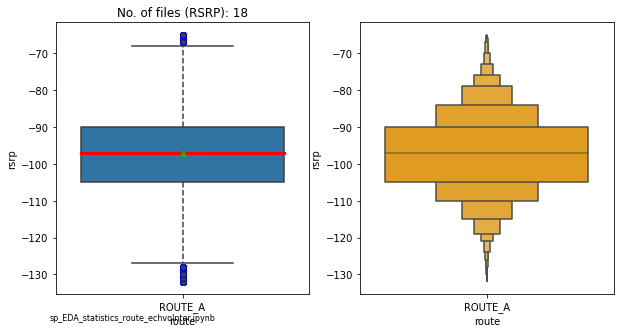

In [14]:
#boxplot give the 5-numbered statistical summary
#Minimum, First Quartile (Q1 or 25th percentile), median, third quartile (Q3 or 75th percentile), and maximum
#Inter Quartile Range (IQR) = The difference between the Q3 and Q1
#some times, a boxplot also helps in identifying the outliers that are far away than (Q3 + (1.5*IQR)) or (Q1 - (1.5*IQR))
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x='route', y='rsrp', data=newDataFrame, 
            showmeans=True, showfliers=True, 
            whiskerprops = dict(linestyle = "dashed"), 
            flierprops = dict(marker = 'o', markersize=6, markeredgecolor="blue"),
            medianprops = dict(linestyle="solid", color='red',linewidth=3),
            ax=ax[0]).set(title = 'No. of files (RSRP): '+ str(cnt))


#The boxen plot is similar to a box plot but provides more information about the shape of the distribution, particularly in the tails
sns.boxenplot(x="route", y="rsrp", data=newDataFrame, color='orange',ax=ax[1]);
plt.annotate(prgname, xy=(0.08,0.04), xycoords='figure fraction', ha='left',color='black',fontsize=8)
#save figure
# fig.savefig("/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/test/signal_prediction_plots/rsrp_boxplots.png", bbox_inches="tight")


Text(0.5, 1.02, 'Pair plot')

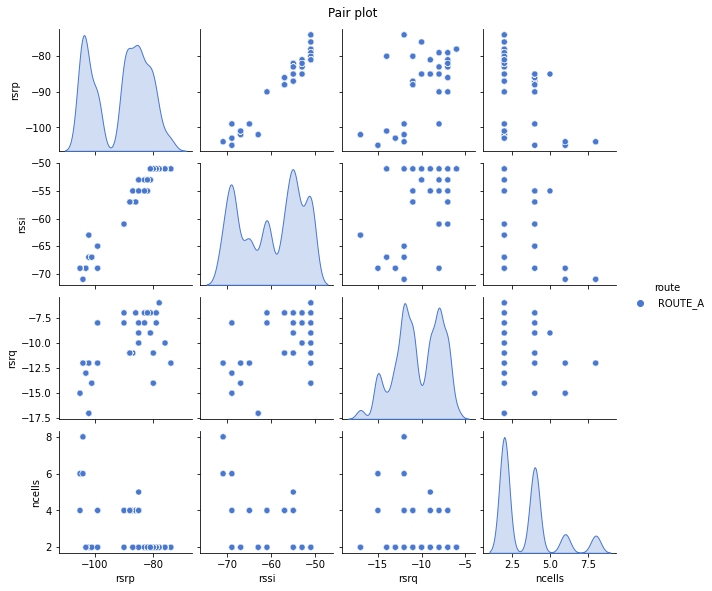

In [15]:
newDataFrame1 = newDataFrame[0:5000]
sns.pairplot(data=newDataFrame1,
             vars = ["rsrp", "rssi", "rsrq","ncells"],  # names of columns used for the plot
             kind="scatter",                        # kind of plots for each pair of different columns
             diag_kind="kde",                       # kind of plots on the diagonal
             hue="route",
             height=2,
             aspect=1.1,
             palette="muted"
             )

plt.suptitle("Pair plot", y=1.02)   # adds title to the plot

# #save figure
# #plt.savefig("/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/RLF_relateddata/plots/rsrp_rssi_rsrq_relations.pdf", bbox_inches="tight")

In [16]:
#drop index column and save as new dataframe
newDataFrame1 = newDataFrame.reset_index(drop= True)
newDataFrame1
# #reset the index by setting existing index as column
# #newDataFrame1 = newDataFrame.reset_index()
from pandas_profiling import ProfileReport
celldata_report = ProfileReport(newDataFrame1, title="RSP data Report")
html_path= "/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/test/signal_prediction_plots/"
celldata_report.to_file(html_path + "Kishore_routeA_stat_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/local/mnt/workspace/qtl/users/kpangalu/conda_envs/projects36/lib/python3.6/site-packages/pandas/core/strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
#prepare a table with statistics for each route

newdf = pd.DataFrame([(name,rte,cnt,tot_pnts,elim,gd_per,rstat[3],rstat[7],rstat[1],med,rstat[2],hisper[0],
                      hisper[1],hisper[2],hisper[3],hisper[4])], 
                     columns=['Volunteer','Route','nfiles','tot_obs','eliminated','considered%','min','max',
                             'mean','median','std','-150to-140(%)','-140to-130(%)','-130to-120(%)','-120to-110(%)','-110to-100(%)'])
display(newdf)

newdff = newdff.append(newdf)

Volunteer    Route  nfiles  tot_obs  eliminated  considered%    min   max  \
0   Kishore  ROUTE_A      18  1475458         536    99.963672 -132.0 -65.0   

        mean  median       std  -150to-140(%)  -140to-130(%)  -130to-120(%)  \
0 -96.998773   -97.0  11.31503            0.0       0.052884       1.938611   

   -120to-110(%)  -110to-100(%)  
0      10.178098      28.306514

In [18]:
display(newdff)

Volunteer    Route  nfiles  tot_obs  eliminated  considered%    min   max  \
0   Kishore  ROUTE_A      18  1475458         536    99.963672 -132.0 -65.0   

        mean  median       std  -150to-140(%)  -140to-130(%)  -130to-120(%)  \
0 -96.998773   -97.0  11.31503            0.0       0.052884       1.938611   

   -120to-110(%)  -110to-100(%)  
0      10.178098      28.306514